In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import enum 

### Idea

- The idea of this exercise is just to <b>plot out Option Greeks</b> under various conditions (e.g. <b>moneyness</b>, <b>Time to Expiration</b>) and understand the intuition

<br>
<br>

### 0. Black Scholes Model

In [8]:
class OptionType(enum.Enum):
    CALL = 1
    PUT = -1

def option_price_BS(CP,S0,K,sigma,t,T,r):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * (T-t)) / (sigma * np.sqrt(T-t))
    d2    = d1 - sigma * np.sqrt(T-t)
    if CP == OptionType.CALL:
        value = st.norm.cdf(d1) * S0 - st.norm.cdf(d2) * K * np.exp(-r * (T-t))
    elif CP == OptionType.PUT:
        value = st.norm.cdf(-d2) * K * np.exp(-r * (T-t)) - st.norm.cdf(-d1)*S0
    return value

<br>
<br>

### 1. Delta

In [9]:
def delta_BS(CP,S0,K,sigma,t,T,r):
    d1 = (np.log(S0/K) + (r + 0.5 * sigma ** 2) * (T-t)) / (sigma * np.sqrt(T-t))
    if CP == OptionType.CALL:
        value = st.norm.cdf(d1)
    elif CP == OptionType.PUT:
       value = st.norm.cdf(d1)-1
    return value

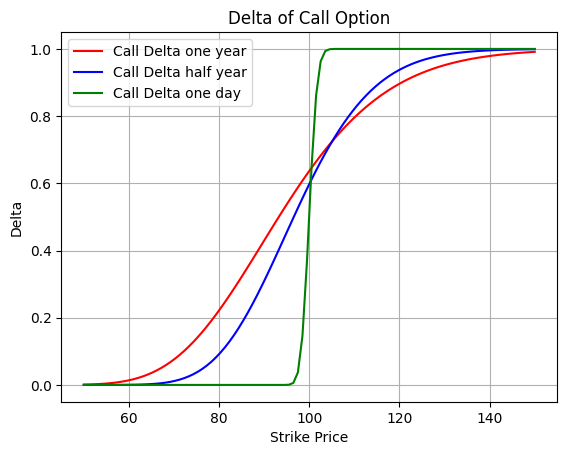

In [18]:
CP = OptionType.CALL
S0 = np.linspace(50, 150, num=100)
r = 0.05
sigma = 0.2
T = 1
K = 100
t = [0, 0.5, 0.995]

delta_one_year = np.zeros(len(S0))
delta_half_year = np.zeros(len(S0))
delta_one_day = np.zeros(len(S0))
for i in range(0, len(S0)):
    delta_one_year[i] = delta_BS(CP,S0[i],K,sigma,t[0],T,r)
    delta_half_year[i] = delta_BS(CP,S0[i],K,sigma,t[1],T,r)
    delta_one_day[i] = delta_BS(CP,S0[i],K,sigma,t[2],T,r)


plt.figure(1)
plt.grid()
plt.plot(S0, delta_one_year, color='red', label='Call Delta one year')
plt.plot(S0, delta_half_year, color='blue', label='Call Delta half year')
plt.plot(S0, delta_one_day, color='green', label='Call Delta one day')
plt.xlabel('Strike Price')
plt.ylabel('Delta')
plt.title('Delta of Call Option')
plt.legend()

#### Delta Intuition
1. Delta is simply the <b>sensitivity of an option's price to a 1 dollar price change in the underlying asset</b>. For example, say a call option has delta=0.5. So if the underlying rises by 1 dollar, you can expect your call to rise by 0.5 dollar

<br>

#### Call Delta and Maturity
1. Call Delta looks almost like a sigmoid curve with <b>curve becoming steeper as option approaches maturity</b>
    - The <b>more time</b> left until an option’s expiration, the <b>less certain</b> it is whether the option will be ITM or OTM at expiration. <b>The deltas of both the ITM and the OTM options reflect that uncertainty</b>
    - The <b>more time left utill expiration, the closer the deltas (especially for ITM and OTM option) tend to gravitate to 0.50</b>.
    - Note that a <b>0.5 delta represents the greatest level of uncertainty</b>. For context, an ATM option that is very very close to maturity has Delta 0.5, it sort of has an equal chance of being ITM or OTM
      
<br>

####  Call Delta and Moneyness
1. For <b>ATM Call options</b>, <b>delta is about 0.5</b>. However, note that <b>call delta is usually higher than 0.5 when call option is not close to maturity</b>
<br>
<br>
2. For <b>ITM Call options</b>, <b>delta is usually greater than 0.5</b>. The <b>more ITM</b> the option is, the <b>closer the delta is to 1</b>.
    - Quite intuitive. Consider an deep ITM option that expires tomorrow.
    - It is very likely that the option will end up being ITM -> a 1 dollar increase in underlying asset gives you almost 1 dollar increase in your call
<br>
<br>
3. For <b>OTM Call options</b>, <b>delta is usually less than 0.5</b>. The <b>more OTM</b> the option is, the <b>closer the delta is to 0</b>.

<br>
<br>

### 2. Vega

In [15]:
def vega_BS(S0,K,sigma,t,T,r):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * (T-t)) / (sigma * np.sqrt(T-t))
    return S0*st.norm.pdf(d1)*np.sqrt(T-t)/100

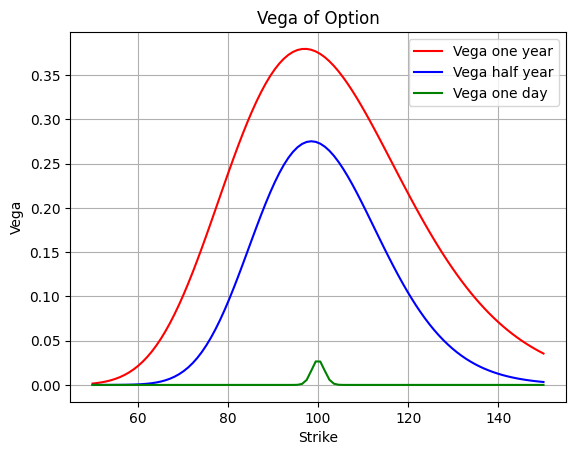

In [17]:
vega_one_year = np.zeros(len(S0))
vega_half_year = np.zeros(len(S0))
vega_one_day = np.zeros(len(S0))
for i in range(0, len(S0)):
    vega_one_year[i] = vega_BS(S0[i],K,sigma,t[0],T,r)
    vega_half_year[i] = vega_BS(S0[i],K,sigma,t[1],T,r)
    vega_one_day[i] = vega_BS(S0[i],K,sigma,t[2],T,r)


plt.figure(1)
plt.grid()
plt.plot(S0, vega_one_year, color='red', label='Vega one year')
plt.plot(S0, vega_half_year, color='blue', label='Vega half year')
plt.plot(S0, vega_one_day, color='green', label='Vega one day')
plt.title('Vega of Option')
plt.xlabel('Strike')
plt.ylabel('Vega')
plt.legend()

#### Vega Intuition
1. Vega is simply the <b>sensitivity of an option's price to a 1% change in implied volatility</b>. For example, a 5.00 dollar option with a 0.25 Vega should be worth around 5.25, if Implied volatility increased by 1%.
<br>
<br>
2. <b>Options always have a positive vega. This means that you would profit from a rise in IV</b>
    - As IV rises, the probability of an option ending ITM increases, but so does the probability of ending OTM.
    - This is because as IV rises, the <b>probability of very positive and very negative returns increases</b>.
    - As the holder of the option, you can only <b>lose your premium in one direction, but have unlimited gains on the other</b>. It is this <b>asymmetric return profile</b> that makes vega positive for options buyers.

<br>

#### Vega and Maturity
1. <b>Vega is greater for longer-dated options. This means that options far away in time are more sensitive to changes in IV</b>
<br>
<br>
2. To intuitively understand this, consider the IV spikes from 20% to 30% for a stock:
    - Consider an option which expires tomorrow:
        - So the market now expects the annualized volatility of the stock to be 30%. However, there <b>isn't enough time left for the option to 'realize' that higher volatility and become ITM</b>
    - Consider an option which expires in a year:
        - There is <b>enough time for the option to 'realize' that higher volatility</b> and there are <b>'realistic' chances that it will expire in the money</b>.

<br>

#### Vega and Moneyness

1. <b>Vega is the highest for at-the-money option</b> 
    - An option’s vega becomes less and less the further your option is from the at the money strike
    - E.g. A call with delta = 1 will have almost no vega because <b>it is so deep ITM that changes in IV won't impact the probability of it ending ITM</b>.
    -  <b>ATM options have the most extrinsic value, this is because they have the most uncertainty whether they will expire in or out of the money<b/>.
    -  The deeper ITM the money, the more likely it will expire ITM, therefore less uncertainty. OTM options have less uncertainty further from the money too.
<br>
<br>
2. <b>The same holds true for puts.</b>